# Deep Learning for Visual Recongintion

## Implement an Autoencoder

### Table of Content:

*   Simple approach on creating encoder decoder and training them using Keras
*   Create an Autoencoder using simple python functions and skitlearn
*   A more general approach in Autonecoder using Pytorch
*   Display result and some conclustions

In [ ]:
!pip install torch torchvision

In [ ]:
!pip install ipywidgets

In [ ]:
torch.__version__

'1.8.1+cu101'

## My first attempt to implement autoencoder structure :)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
input_size = 784
hidden_size_1 = 256
hidden_size_2 = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation='sigmoid')(input_img)
hidden_2 = Dense(hidden_size_2, activation='sigmoid')(hidden_1)
code = Dense(code_size, activation='sigmoid')(hidden_2)
hidden_3 = Dense(hidden_size_2, activation='sigmoid')(code)
hidden_4 = Dense(hidden_size_1, activation='sigmoid')(hidden_3)
output_img = Dense(input_size, activation='sigmoid')(hidden_4)

Training autoencoder using Mean Squared Error

In [ ]:
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0461
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0326
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0301
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0274
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0260
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0247
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218
Epoch 11/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206
Epoch 12/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195
E

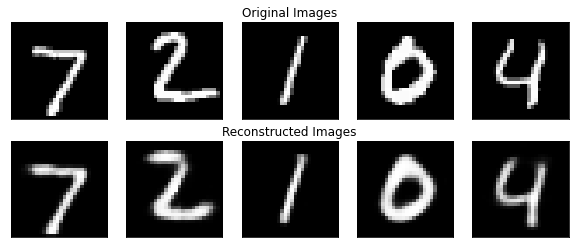

In [ ]:
reconsturcted_images = autoencoder.predict(x_test)
plt.figure(figsize=(10, 4))
for i in range(5):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape((28, 28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 2:
    ax.set_title('Original Images')

  # plot reconstruction
  ax = plt.subplot(2, 5, i + 6)
  plt.imshow(reconsturcted_images[i].reshape((28, 28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 2:
    ax.set_title('Reconstructed Images')
plt.show()


Training Autoencoder using Binary Cross Entropy


In [ ]:
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1057
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1033
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1018
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1001
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0989
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0977
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0965
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0954
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0942
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0934
Epoch 11/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0922
Epoch 12/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0916
E

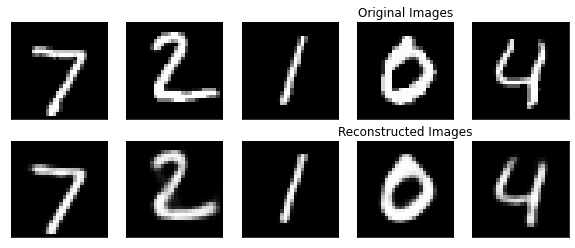

In [ ]:
reconsturcted_images = autoencoder.predict(x_test)
plt.figure(figsize=(10, 4))
for i in range(5):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape((28, 28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 3:
    ax.set_title('Original Images')

  # plot reconstruction
  ax = plt.subplot(2, 5, i + 6)
  plt.imshow(reconsturcted_images[i].reshape((28, 28)))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 3:
    ax.set_title('Reconstructed Images')
plt.show()


Well judging from the reconstructed images they seems pretty similar. One way to see the difference might be to compute a loss function like Least Squared Error between two images and to see the difference. This is like substracting every pixel in the original image from every pixel in reconstructed image and then sum the square of each difference. The model with smallest error value is the best one. But this requires some extra efforts.

## Autoencoder implemented by using sklearn packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [ ]:
train_x = np.load('./data/mnist_train_images.npy')
train_y = np.load('./data/mnist_train_labels.npy')
test_x = np.load('./data/mnist_test_images.npy')
test_y = np.load('./data/mnist_test_labels.npy')

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)


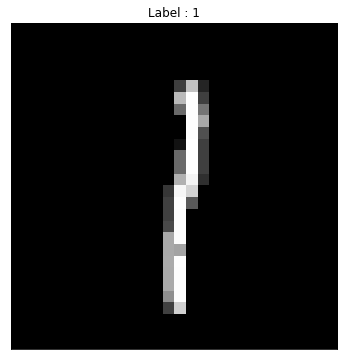

In [ ]:
idx = np.random.randint(train_x.shape[0])
img = train_x[idx].reshape(28,28)

plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[idx,:])))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
n_input = 28*28

# Encoder structure
n_encoder1 = 256
n_encoder2 = 128
n_latent = 2
# Decoder structure
n_decoder2 = 128
n_decoder1 = 256



In [ ]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1),
                   activation = 'tanh',
                   solver = 'adam',
                   learning_rate_init = 0.0001,
                   max_iter = 20,
                   tol = 0.0000001,
                   verbose = True)

In [ ]:
reg.fit(train_x, train_x)

Iteration 1, loss = 0.03849309
Iteration 2, loss = 0.02736002
Iteration 3, loss = 0.02404814
Iteration 4, loss = 0.02322506
Iteration 5, loss = 0.02283553
Iteration 6, loss = 0.02253432
Iteration 7, loss = 0.02235350
Iteration 8, loss = 0.02225753
Iteration 9, loss = 0.02218298
Iteration 10, loss = 0.02210321
Iteration 11, loss = 0.02202472
Iteration 12, loss = 0.02196074
Iteration 13, loss = 0.02190800
Iteration 14, loss = 0.02187504
Iteration 15, loss = 0.02185654
Iteration 16, loss = 0.02184292
Iteration 17, loss = 0.02183166
Iteration 18, loss = 0.02182700
Iteration 19, loss = 0.02181920
Iteration 20, loss = 0.02181277


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256, 128, 2, 128, 256),
             learning_rate='constant', learning_rate_init=0.0001, max_fun=15000,
             max_iter=20, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=1e-07, validation_fraction=0.1,
             verbose=True, warm_start=False)

Display the reconstructed image

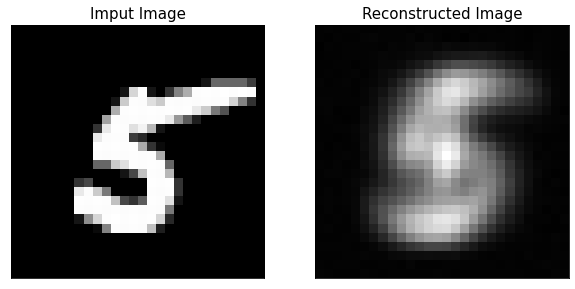

In [ ]:
idx = np.random.randint(test_x.shape[0])
x_reconst = reg.predict(test_x[idx].reshape(-1,784))

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(test_x[idx].reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

Reference: [
By Prof. Seungchul Lee 15-Autoencoder](https://i-systems.github.io/teaching/ML/iNotes/15_Autoencoder.html)

## This is Auto encoder class using pytorch.

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
from ipywidgets import IntProgress
from tqdm.notebook import tqdm

In [ ]:
class AE(torch.nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = torch.nn.Linear(
            in_features=kwargs["input_shape"], out_features=256
        )
        self.encoder_output_layer = torch.nn.Linear(
            in_features=256, out_features=128
        )
        self.decoder_hidden_layer = torch.nn.Linear(
            in_features=128, out_features=256
        )
        self.decoder_output_layer = torch.nn.Linear(
            in_features=256, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.sigmoid(activation)
        code = self.encoder_output_layer(activation)
        code = torch.sigmoid(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.sigmoid(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.sigmoid(activation)
        return reconstructed

Load the data

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [ ]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=784).to(device)

# Adam optimizer with learning rate 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_autoencoder(model, optimizer, n, loss):
  if loss == 'mse':
    # mean-squared error loss
    criterion = torch.nn.MSELoss()
  if loss == 'bce':
    # binary-cross-entropy error loss
    criterion = torch.nn.BCELoss()

  for epoch in tqdm(range(n)):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)

        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()

        # compute reconstructions
        outputs = model(batch_features)

        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)

        # compute accumulated gradients
        train_loss.backward()

        # perform parameter update based on current gradients
        optimizer.step()

        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()

    # compute the epoch training loss
    loss = loss / len(train_loader)

    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, 20, loss))

Using MSE to traing the autoencoder model

In [ ]:
train_autoencoder(model, optimizer, 20, 'mse')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch : 1/20, loss = 0.065633
epoch : 2/20, loss = 0.047258
epoch : 3/20, loss = 0.035839
epoch : 4/20, loss = 0.028350
epoch : 5/20, loss = 0.023911
epoch : 6/20, loss = 0.020438
epoch : 7/20, loss = 0.017939
epoch : 8/20, loss = 0.015933
epoch : 9/20, loss = 0.014323
epoch : 10/20, loss = 0.013047
epoch : 11/20, loss = 0.012073
epoch : 12/20, loss = 0.011294
epoch : 13/20, loss = 0.010623
epoch : 14/20, loss = 0.010033
epoch : 15/20, loss = 0.009512
epoch : 16/20, loss = 0.009037
epoch : 17/20, loss = 0.008614
epoch : 18/20, loss = 0.008237
epoch : 19/20, loss = 0.007895
epoch : 20/20, loss = 0.007585



Using Binary Cross Entropy

In [ ]:
train_autoencoder(model, optimizer, 20, 'bce');

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch : 1/20, loss = 0.258656
epoch : 2/20, loss = 0.213268
epoch : 3/20, loss = 0.172546
epoch : 4/20, loss = 0.152603
epoch : 5/20, loss = 0.137841
epoch : 6/20, loss = 0.125804
epoch : 7/20, loss = 0.117286
epoch : 8/20, loss = 0.111140
epoch : 9/20, loss = 0.105993
epoch : 10/20, loss = 0.101597
epoch : 11/20, loss = 0.098192
epoch : 12/20, loss = 0.095499
epoch : 13/20, loss = 0.093327
epoch : 14/20, loss = 0.091504
epoch : 15/20, loss = 0.089868
epoch : 16/20, loss = 0.088395
epoch : 17/20, loss = 0.087108
epoch : 18/20, loss = 0.086032
epoch : 19/20, loss = 0.085041
epoch : 20/20, loss = 0.084159



Reference: [Implementing an Autoencoder in PyTorch - Abien Fred Agarap(2020, Jan 26)](https://medium.com/pytorch/implementing-an-autoencoder-in-pytorch-19baa22647d1)